# Facial Mapping for Clustering Human Features - Unsupervised Learning 





By Joshua Armah

In [ ]:
# Dependencies for Model
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
pl.rcParams['figure.figsize'] = (10, 7)
seaborn.set()
import numpy as np
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [ ]:
# Dataset for random faces
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
#Explain the Faces Dataset
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [ ]:
# Create Clusters with Data

Reduced dataset shape: (400, 2)


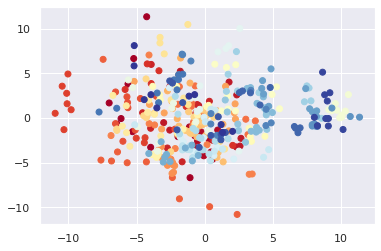

In [ ]:
X, y = faces.data, faces.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')


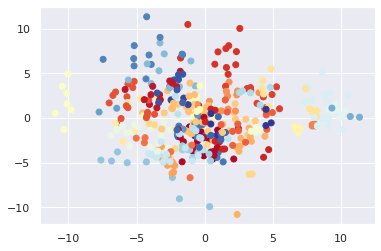

In [ ]:
#Fix RNG in KMeans
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=40, random_state=0) 
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

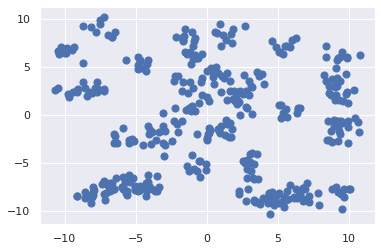

In [ ]:
#visualize as blob
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=400, centers=40,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

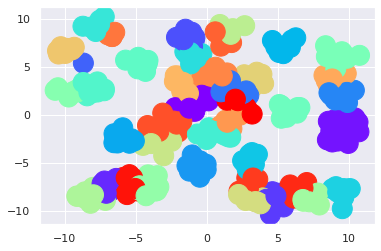

In [ ]:
# Visualize Face Clusters
from sklearn.cluster import KMeans
est = KMeans(40) 
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=400, cmap='rainbow');